In [6]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
from python_speech_features import mfcc, logfbank
%matplotlib inline

In [7]:

#plot signals
def plot_signals(signals):
    fig, axes =plt.subplots(nrows =2, ncols=5,sharex=False,sharey=True,figsize=(20,5))
    fig.suptitle("Time series",size =16)
    i =0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i]) 
            axes[x,y].plot(list(signals.values())[i])
            i += 1
    
# plot fourier transformed signals    
def plot_fft(fft):
    fig, axes =plt.subplots(nrows =2, ncols=5,sharex=False,sharey=True,figsize=(20,5))
    fig.suptitle("FFT",size =16)
    i =0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fft.keys())[i]) 
            axes[x,y].plot(list(fft.values())[i])
            i += 1
    
    
def plot_fbank(fbank):
    fig, axes =plt.subplots(nrows =2, ncols=5,sharex=False,sharey=True,figsize=(20,5))
    fig.suptitle("Filter bank coefficients",size =16)
    i =0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i]) 
            axes[x,y].imshow(list(fbank.values())[i],cmap='hot',interpolation='nearest')
            i += 1
            
            
            
def plot_mfcc(mfccs):
    fig, axes =plt.subplots(nrows =2, ncols=5,sharex=False,sharey=True,figsize=(20,5))
    fig.suptitle("Mfccs",size =16)
    i =0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i]) 
            axes[x,y].imshow(list(mfccs.values())[i],cmap='hot',interpolation='nearest')
            i += 1
            

In [8]:
fft ={}
fbank ={}
signals ={}
mfccs ={}

def find_fft(signal, rate):
    n = len(signal)
    freq = np.fft.rfftfreq(n ,d =1/rate)
    Y = np.abs(np.fft.rfft(signal)/n)
    return (Y, freq)


def envelope(y,rate, threshold):
    masks =[]
    y =pd.Series(y).apply(np.abs)
    y_mean =y.rolling(window =int(rate/10), min_periods =1, center =True).mean()
    for mean in y_mean:
        if mean > threshold:
            masks.append(True)
        else:
            masks.append(False)
    return masks

for f in tqdm(os.listdir('AllAudioWav')):
    signal,rate =librosa.load('AllAudioWav/'+f,sr=2048)
    mask =envelope(signal, rate,0.00005)
    signal =signal[mask]
    signals[f] = signal
    f_transform =find_fft(signal,rate)
    fft[f] =f_transform
    bank =logfbank(signal[:rate], rate, nfilt  =10, nfft=51).T
    fbank[f] =bank
    mel =mfcc(signal[:rate], rate, numcep =5, nfilt=10, nfft =51).T
    mfccs[f] = mel
    

if len(os.listdir('Clean')) == 0:
    for f in tqdm(os.listdir('AllAudioWav')):
        signal,rate =librosa.load('AllAudioWav/'+f,sr=256)
        mask =envelope(signal, rate,0.00005)
        wavfile.write(filename ='Clean/'+f, rate =rate, data=signal[mask])

100%|██████████| 75/75 [08:03<00:00,  6.45s/it]


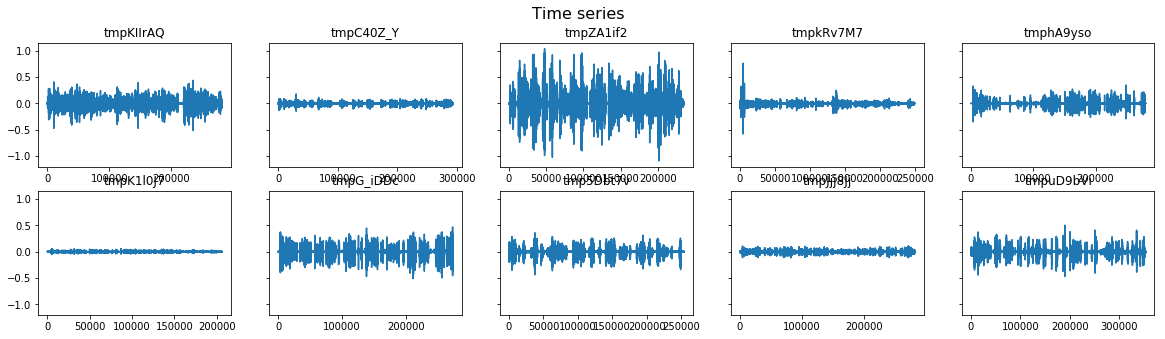

In [9]:
plot_signals(signals)
plt.show()

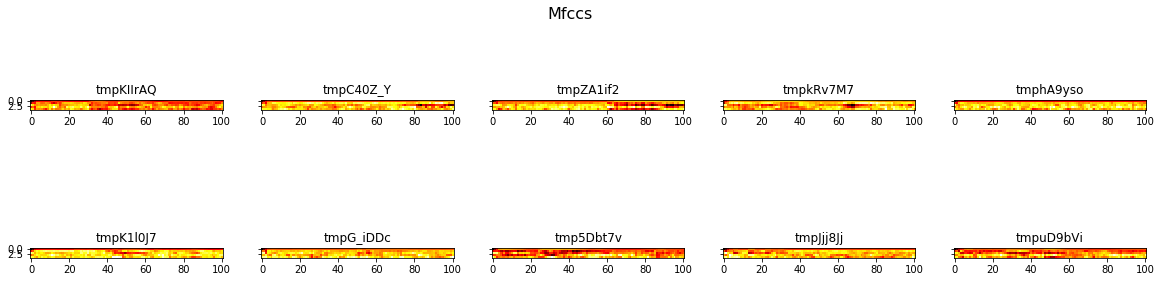

In [10]:
plot_mfcc(mfccs)
plt.show()

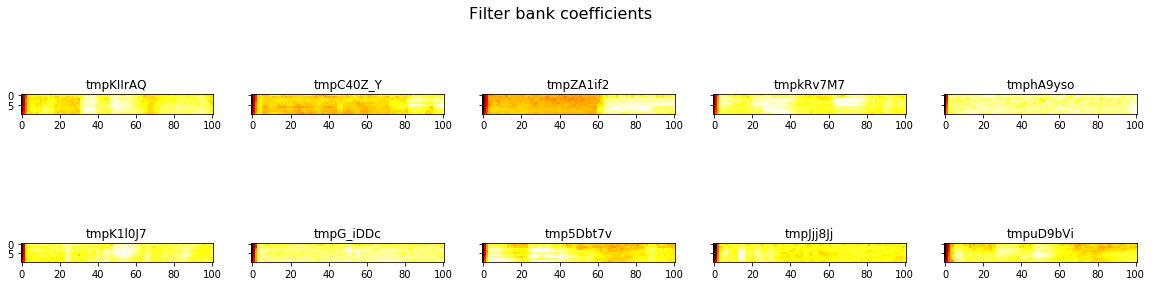

In [11]:
plot_fbank(fbank)
plt.show()

In [ ]:
plot_fft(fft)
plt.show()